<a href="https://colab.research.google.com/github/asadstat/Data_analysis/blob/master/Traditional_ML_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import sklearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
full_df = pd.read_csv("/content/drive/MyDrive/data/sentiment(1).csv",usecols=['title','Sentiment'], nrows=5000)
df = full_df[["title",'Sentiment']]
df["text1"] = df["title"].astype(str)
full_df.head()

,title,Sentiment
0,Three Industrial Giants You Should Own In 2020,Positive
1,Labor Stocks Are Going To Break Out In 2020,Positive
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive
3,"On the road to AI adoption, execs grapple with...",Positive
4,Red Carpet Sustainability After Coronavirus Sh...,Positive


In [ ]:
df["text_lower"] = df["text1"].str.lower()
df.head()

,title,Sentiment,text1,text_lower
0,Three Industrial Giants You Should Own In 2020,Positive,Three Industrial Giants You Should Own In 2020,three industrial giants you should own in 2020
1,Labor Stocks Are Going To Break Out In 2020,Positive,Labor Stocks Are Going To Break Out In 2020,labor stocks are going to break out in 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive,"Tesla (TSLA) Breaks Shipment Record, Beats Est...","tesla (tsla) breaks shipment record, beats est..."
3,"On the road to AI adoption, execs grapple with...",Positive,"On the road to AI adoption, execs grapple with...","on the road to ai adoption, execs grapple with..."
4,Red Carpet Sustainability After Coronavirus Sh...,Positive,Red Carpet Sustainability After Coronavirus Sh...,red carpet sustainability after coronavirus sh...


In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_punc"] = df["text_lower"].apply(lambda text: remove_punctuation(text))
df.head()

,title,Sentiment,text1,text_lower,text_punc
0,Three Industrial Giants You Should Own In 2020,Positive,Three Industrial Giants You Should Own In 2020,three industrial giants you should own in 2020,three industrial giants you should own in 2020
1,Labor Stocks Are Going To Break Out In 2020,Positive,Labor Stocks Are Going To Break Out In 2020,labor stocks are going to break out in 2020,labor stocks are going to break out in 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive,"Tesla (TSLA) Breaks Shipment Record, Beats Est...","tesla (tsla) breaks shipment record, beats est...",tesla tsla breaks shipment record beats estima...
3,"On the road to AI adoption, execs grapple with...",Positive,"On the road to AI adoption, execs grapple with...","on the road to ai adoption, execs grapple with...",on the road to ai adoption execs grapple with ...
4,Red Carpet Sustainability After Coronavirus Sh...,Positive,Red Carpet Sustainability After Coronavirus Sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability after coronavirus sh...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_stop"] = df["text_punc"].apply(lambda text: remove_stopwords(text))
df.head()

,title,Sentiment,text1,text_lower,text_punc,text_stop
0,Three Industrial Giants You Should Own In 2020,Positive,Three Industrial Giants You Should Own In 2020,three industrial giants you should own in 2020,three industrial giants you should own in 2020,three industrial giants 2020
1,Labor Stocks Are Going To Break Out In 2020,Positive,Labor Stocks Are Going To Break Out In 2020,labor stocks are going to break out in 2020,labor stocks are going to break out in 2020,labor stocks going break 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive,"Tesla (TSLA) Breaks Shipment Record, Beats Est...","tesla (tsla) breaks shipment record, beats est...",tesla tsla breaks shipment record beats estima...,tesla tsla breaks shipment record beats estima...
3,"On the road to AI adoption, execs grapple with...",Positive,"On the road to AI adoption, execs grapple with...","on the road to ai adoption, execs grapple with...",on the road to ai adoption execs grapple with ...,road ai adoption execs grapple expertise data
4,Red Carpet Sustainability After Coronavirus Sh...,Positive,Red Carpet Sustainability After Coronavirus Sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability coronavirus top prio...


In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text_stop"].apply(lambda text: stem_words(text))
df.head()

,title,Sentiment,text1,text_lower,text_punc,text_stop,text_stemmed
0,Three Industrial Giants You Should Own In 2020,Positive,Three Industrial Giants You Should Own In 2020,three industrial giants you should own in 2020,three industrial giants you should own in 2020,three industrial giants 2020,three industri giant 2020
1,Labor Stocks Are Going To Break Out In 2020,Positive,Labor Stocks Are Going To Break Out In 2020,labor stocks are going to break out in 2020,labor stocks are going to break out in 2020,labor stocks going break 2020,labor stock go break 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive,"Tesla (TSLA) Breaks Shipment Record, Beats Est...","tesla (tsla) breaks shipment record, beats est...",tesla tsla breaks shipment record beats estima...,tesla tsla breaks shipment record beats estima...,tesla tsla break shipment record beat estim fo...
3,"On the road to AI adoption, execs grapple with...",Positive,"On the road to AI adoption, execs grapple with...","on the road to ai adoption, execs grapple with...",on the road to ai adoption execs grapple with ...,road ai adoption execs grapple expertise data,road ai adopt exec grappl expertis data
4,Red Carpet Sustainability After Coronavirus Sh...,Positive,Red Carpet Sustainability After Coronavirus Sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability coronavirus top prio...,red carpet sustain coronaviru top prioriti


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_stemmed"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,Sentiment,text1,text_lower,text_punc,text_stop,text_stemmed,text_lemmatized
0,Three Industrial Giants You Should Own In 2020,Positive,Three Industrial Giants You Should Own In 2020,three industrial giants you should own in 2020,three industrial giants you should own in 2020,three industrial giants 2020,three industri giant 2020,three industri giant 2020
1,Labor Stocks Are Going To Break Out In 2020,Positive,Labor Stocks Are Going To Break Out In 2020,labor stocks are going to break out in 2020,labor stocks are going to break out in 2020,labor stocks going break 2020,labor stock go break 2020,labor stock go break 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive,"Tesla (TSLA) Breaks Shipment Record, Beats Est...","tesla (tsla) breaks shipment record, beats est...",tesla tsla breaks shipment record beats estima...,tesla tsla breaks shipment record beats estima...,tesla tsla break shipment record beat estim fo...,tesla tsla break shipment record beat estim fo...
3,"On the road to AI adoption, execs grapple with...",Positive,"On the road to AI adoption, execs grapple with...","on the road to ai adoption, execs grapple with...",on the road to ai adoption execs grapple with ...,road ai adoption execs grapple expertise data,road ai adopt exec grappl expertis data,road ai adopt exec grappl expertis data
4,Red Carpet Sustainability After Coronavirus Sh...,Positive,Red Carpet Sustainability After Coronavirus Sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability coronavirus top prio...,red carpet sustain coronaviru top prioriti,red carpet sustain coronaviru top prioriti


In [ ]:
df['Sentiment']=df['Sentiment'].apply(lambda x: 1 if x=='Positive' else 0)

In [ ]:
# Feature Extraction
tfidf = TfidfVectorizer(sublinear_tf=True,
                            analyzer='word',
                            ngram_range=(1,1),
                            max_features=5444)

In [ ]:
X = tfidf.fit_transform(df['text_lemmatized'].values.astype('U'))
Y = df['Sentiment']

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
#%matplotlib ipympl
import matplotlib.pyplot as plt

In [ ]:
smk_biagram = SMOTETomek(random_state=42)
X_v1,Y_v1=smk_biagram.fit_resample(X,Y)

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_v1)))

Original dataset shape Counter({1: 4317, 0: 683})
Resampled dataset shape Counter({1: 4317, 0: 4317})


In [ ]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(X_v1,Y_v1,test_size = 0.20, random_state= True)

In [ ]:
# Decission Tree Classifier
decession_tree = DecisionTreeClassifier()
decession_tree.fit(x_train,y_train)
y_pred_decession_tree = decession_tree.predict(x_test)
print("Decission Tree Classifier")
print(classification_report(y_test, y_pred_decession_tree))
# Random Forest  Classifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred_random_forest = random_forest.predict(x_test)
print("Random Forest  Classifier")
print(classification_report(y_test, y_pred_random_forest))
# KNN  Algo
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
y_pred_knn_classifier = knn_classifier.predict(x_test)
print("KNN  Algo")
print(classification_report(y_test, y_pred_knn_classifier))


Decission Tree Classifier
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       859
           1       0.87      0.89      0.88       868

    accuracy                           0.88      1727
   macro avg       0.88      0.88      0.88      1727
weighted avg       0.88      0.88      0.88      1727

Random Forest  Classifier
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       859
           1       0.92      0.98      0.95       868

    accuracy                           0.95      1727
   macro avg       0.95      0.95      0.95      1727
weighted avg       0.95      0.95      0.95      1727

KNN  Algo
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       859
           1       0.99      0.30      0.46       868

    accuracy                           0.65      1727
   macro avg       0.79      0.65      0.60      1727
weighted avg

In [ ]:
X1 = np.array(X_v1)
Y1 = np.array(Y_v1)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10,random_state=None)
folds.get_n_splits(X_v1,Y_v1)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import metrics

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.876
Confusion matrix, without normalization


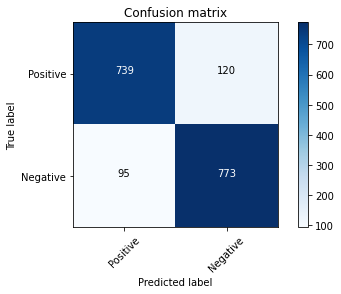

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools
score = metrics.accuracy_score(y_test, y_pred_decession_tree)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred_decession_tree)
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0

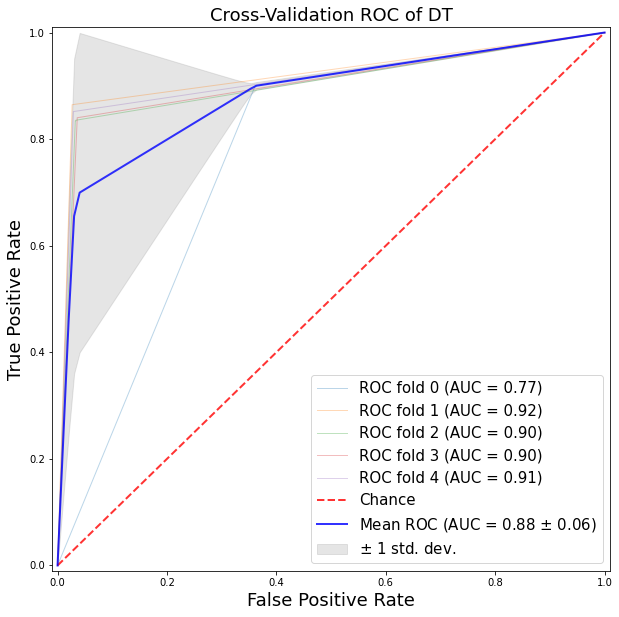

In [ ]:
# Classification and ROC analysis
#classifier = SVC(probability=True)
cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_v1, Y_v1):
    probas_ = decession_tree.fit(X_v1[train], Y_v1[train]).predict_proba(X_v1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_v1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of DT',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

accuracy:   0.946
Confusion matrix, without normalization


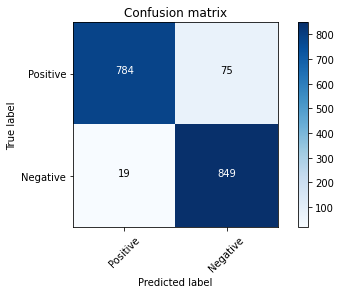

In [ ]:
score = metrics.accuracy_score(y_test, y_pred_random_forest)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred_random_forest)
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0

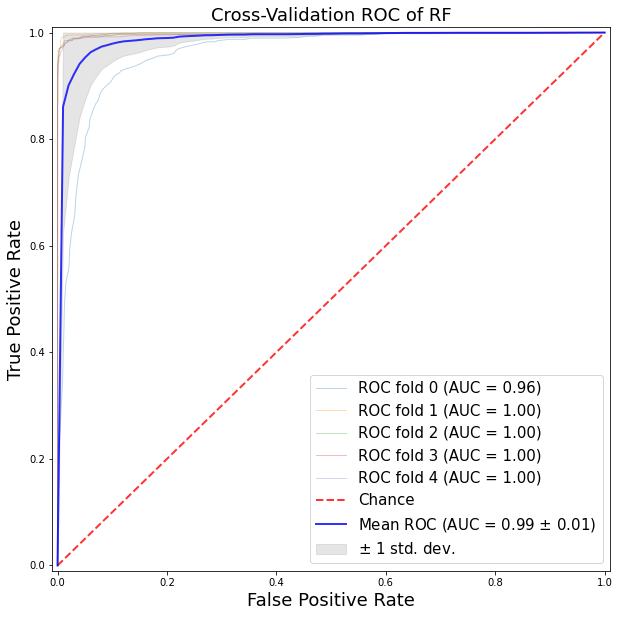

In [ ]:
# Classification and ROC analysis
#classifier = SVC(probability=True)
cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_v1, Y_v1):
    probas_ = random_forest.fit(X_v1[train], Y_v1[train]).predict_proba(X_v1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_v1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of RF',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

accuracy:   0.648
Confusion matrix, without normalization


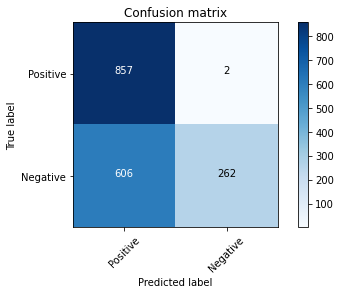

In [ ]:
score = metrics.accuracy_score(y_test, y_pred_knn_classifier)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred_knn_classifier)
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0

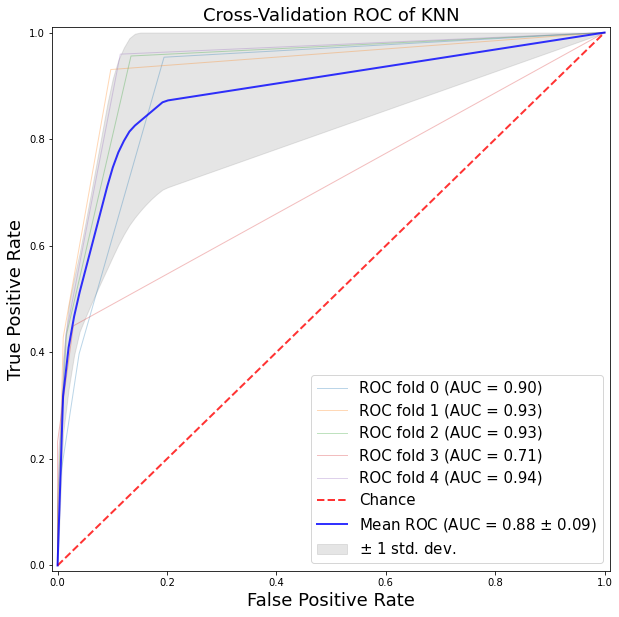

In [ ]:
# Classification and ROC analysis
#classifier = SVC(probability=True)
cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_v1, Y_v1):
    probas_ = knn_classifier.fit(X_v1[train], Y_v1[train]).predict_proba(X_v1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_v1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of KNN',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

In [ ]:
# Multinomial Naive Bias
mulNB = MultinomialNB()
mulNB.fit(x_train,y_train)
y_pred_mulNB = mulNB.predict(x_test)
print("Multinomial Naive Bias")
print(classification_report(y_test, y_pred_mulNB))

Multinomial Naive Bias
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       859
           1       0.91      0.77      0.84       868

    accuracy                           0.85      1727
   macro avg       0.85      0.85      0.85      1727
weighted avg       0.85      0.85      0.85      1727



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.847
Confusion matrix, without normalization


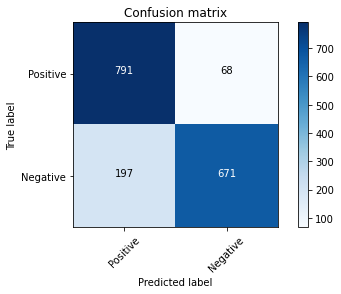

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools
score = metrics.accuracy_score(y_test, y_pred_mulNB)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred_mulNB)
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0

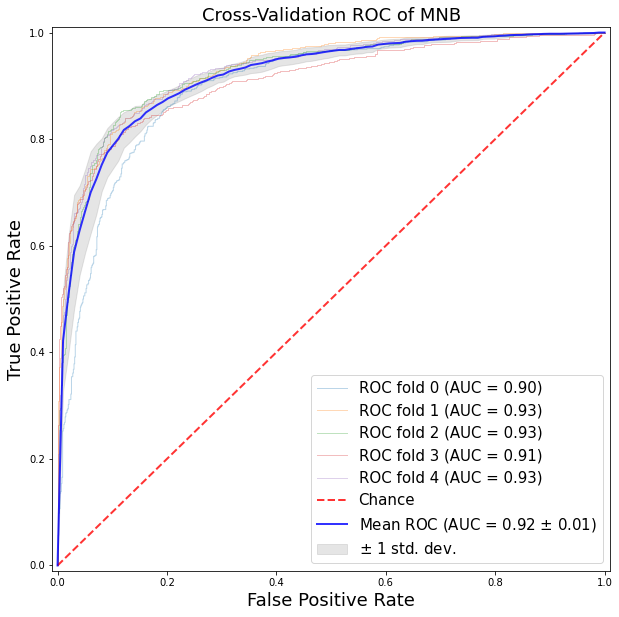

In [ ]:
# Classification and ROC analysis
#classifier = SVC(probability=True)
cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_v1, Y_v1):
    probas_ = mulNB.fit(X_v1[train], Y_v1[train]).predict_proba(X_v1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_v1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of MNB',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

In [ ]:
# Gradient bossting
gradient_bossting = GradientBoostingClassifier(random_state=3)
gradient_bossting.fit(x_train,y_train)
y_pred_gradientbossting = gradient_bossting.predict(x_test)
print("GradientBosting  Algo")
print(classification_report(y_test, y_pred_gradientbossting))
# SVM
svm_class = svm.SVC(kernel='poly',probability=True)
svm_class.fit(x_train,y_train)
y_pred_svm = svm_class.predict(x_test)
print("SVM  Algo")
print(classification_report(y_test, y_pred_svm))
# Logistic Regressor
logis_reg =LogisticRegression()
logis_reg.fit(x_train,y_train)
y_pred_log = logis_reg.predict(x_test)
print("Logistic Reg  Algo")
print(classification_report(y_test, y_pred_log))

GradientBosting  Algo
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       859
           1       0.78      0.95      0.86       868

    accuracy                           0.84      1727
   macro avg       0.86      0.84      0.84      1727
weighted avg       0.86      0.84      0.84      1727

SVM  Algo
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       859
           1       0.99      0.98      0.98       868

    accuracy                           0.98      1727
   macro avg       0.99      0.98      0.98      1727
weighted avg       0.99      0.98      0.98      1727

Logistic Reg  Algo
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       859
           1       0.88      0.86      0.87       868

    accuracy                           0.87      1727
   macro avg       0.87      0.87      0.87      1727
weighted avg       0.87

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.839
Confusion matrix, without normalization


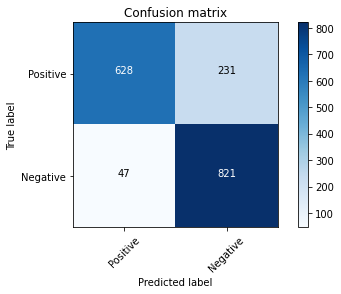

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
import itertools
score = metrics.accuracy_score(y_test, y_pred_gradientbossting)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred_gradientbossting)
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0

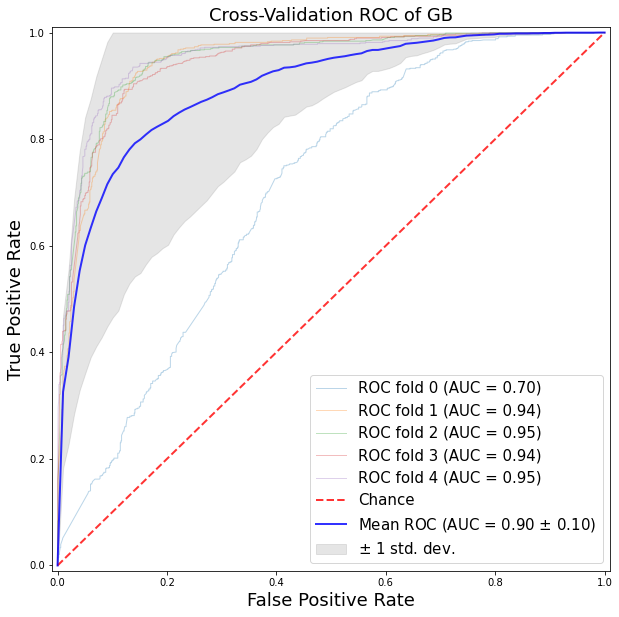

In [ ]:
# Classification and ROC analysis
#classifier = SVC(probability=True)
cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_v1, Y_v1):
    probas_ = gradient_bossting.fit(X_v1[train], Y_v1[train]).predict_proba(X_v1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_v1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of GB',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.985
Confusion matrix, without normalization


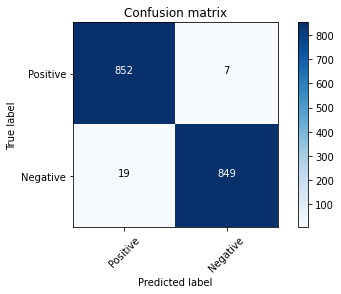

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
import itertools
score = metrics.accuracy_score(y_test, y_pred_svm)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0

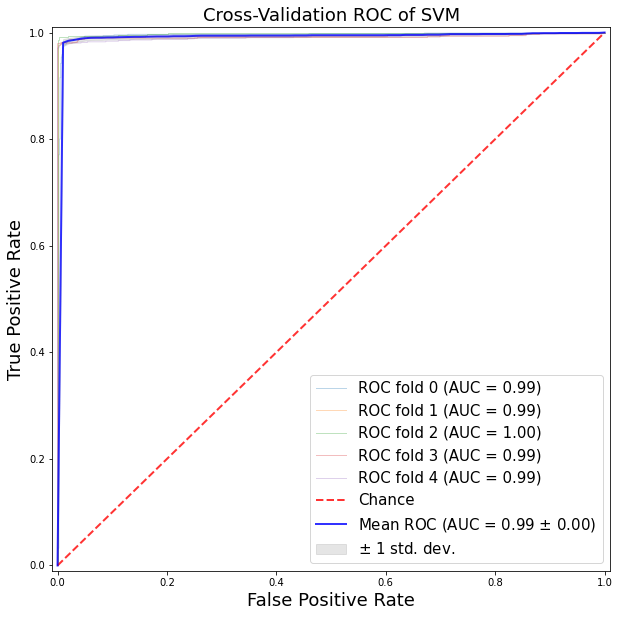

In [ ]:
# Classification and ROC analysis
#classifier = SVC(probability=True)
cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_v1, Y_v1):
    probas_ = svm_class.fit(X_v1[train], Y_v1[train]).predict_proba(X_v1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_v1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of SVM',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.871
Confusion matrix, without normalization


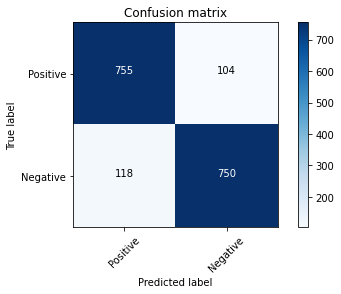

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
import itertools
score = metrics.accuracy_score(y_test, y_pred_log)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred_log)
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0

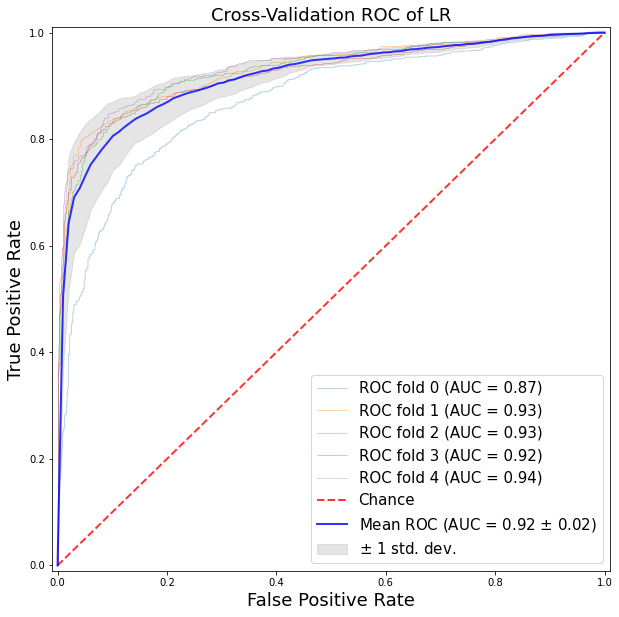

In [ ]:
# Classification and ROC analysis
#classifier = SVC(probability=True)
cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_v1, Y_v1):
    probas_ = logis_reg.fit(X_v1[train], Y_v1[train]).predict_proba(X_v1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_v1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of LR',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()